# AOL Machine Learning

Kelompok 6

Feta Kalih Wigati - 2502019451

Sekar Alisha Firdaus - 2501970531

Salsa Deswina Raihani - 2502069361

Dataset : Diabetes

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score

SEED = 42
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabet = pd.read_csv('diabetes.csv') 
diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabet = diabet.drop_duplicates()

## Feature Engineering

#### Imputation

In [6]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetcopy = diabet.copy(deep = True)
diabetcopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetcopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
print(diabetcopy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


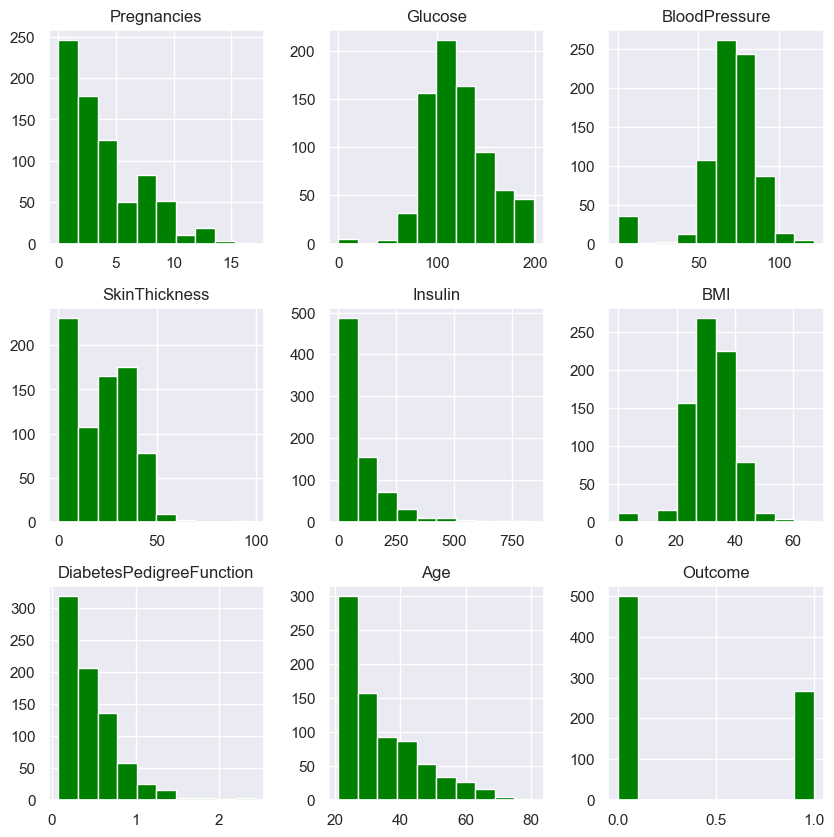

In [9]:
# Mengecek apakah ada nilai 0 lewat visualization
p = diabet.hist(color='green',figsize = (10,10))

In [10]:
diabetcopy['Glucose'].fillna(diabetcopy['Glucose'].mean(), inplace = True)
diabetcopy['BloodPressure'].fillna(diabetcopy['BloodPressure'].mean(), inplace = True)
diabetcopy['SkinThickness'].fillna(diabetcopy['SkinThickness'].median(), inplace = True)
diabetcopy['Insulin'].fillna(diabetcopy['Insulin'].median(), inplace = True)
diabetcopy['BMI'].fillna(diabetcopy['BMI'].median(), inplace = True)

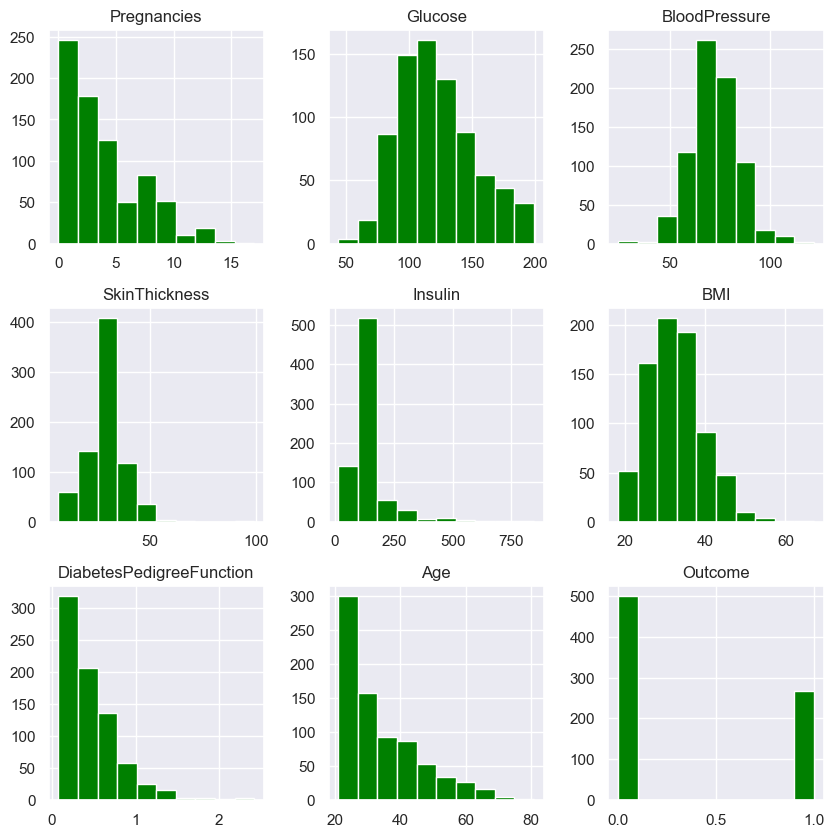

In [11]:
p = diabetcopy.hist(color='green',figsize = (10,10))

#### Menghitung Value

In [12]:
diabetcopy.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

Text(0.5, 1.0, 'Diabetes Outcome')

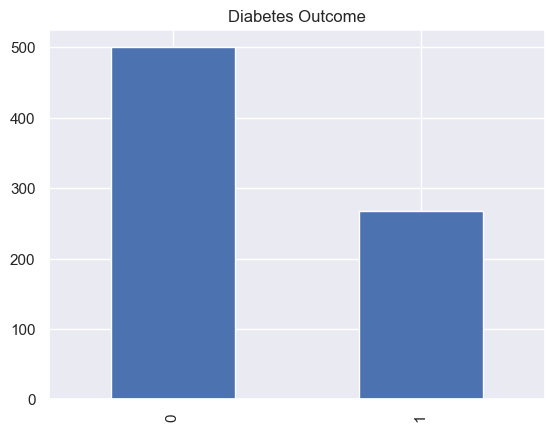

In [13]:
diabet.Outcome.value_counts()
diabet['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

In [14]:
diabet.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Korelasi antar kolom

<AxesSubplot:>

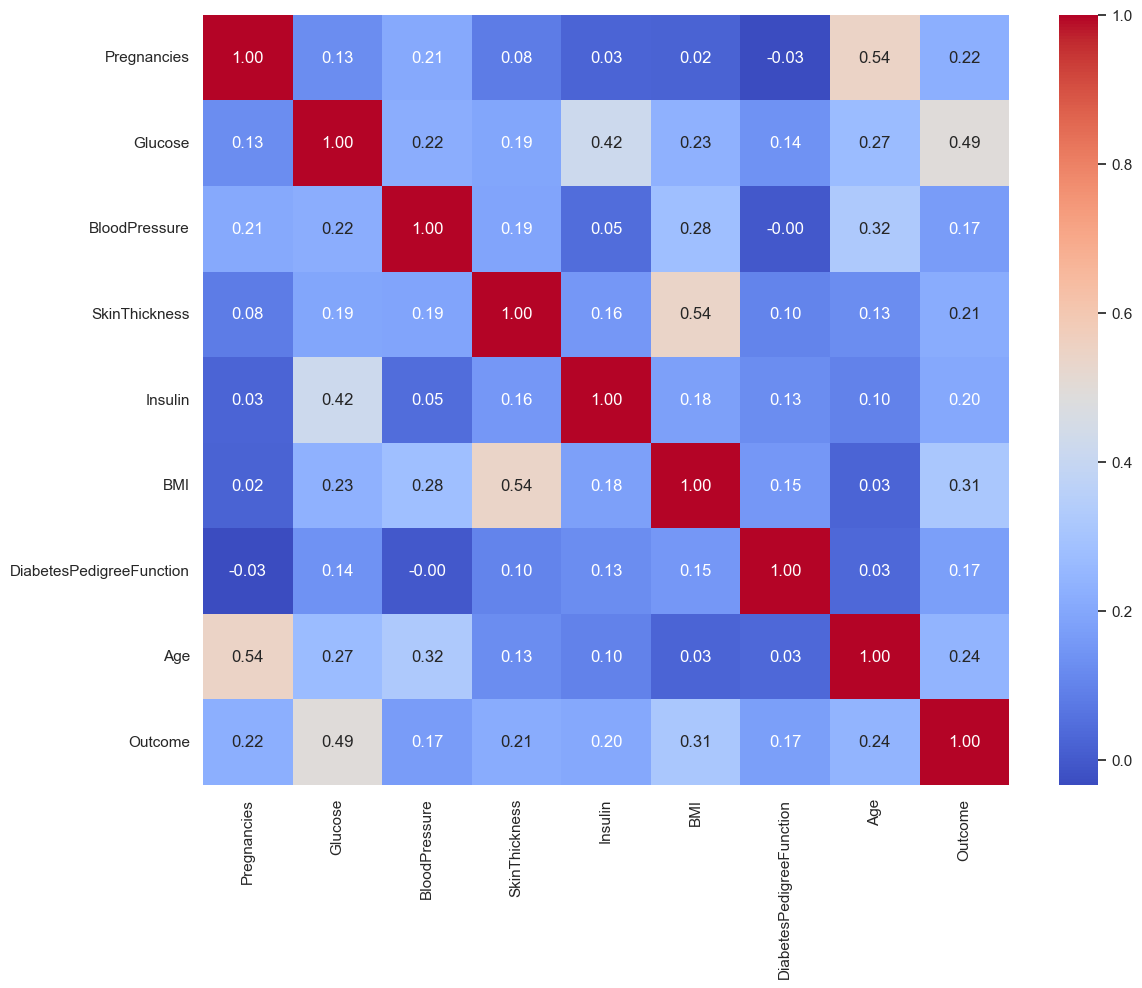

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(diabetcopy.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### Mencari Outliers

#### Pregnancies Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df2665d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df2665dd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df2665d520>],
 'medians': [<matplotlib.lines.Line2D at 0x1df2666b370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df2666b640>],
 'means': []}

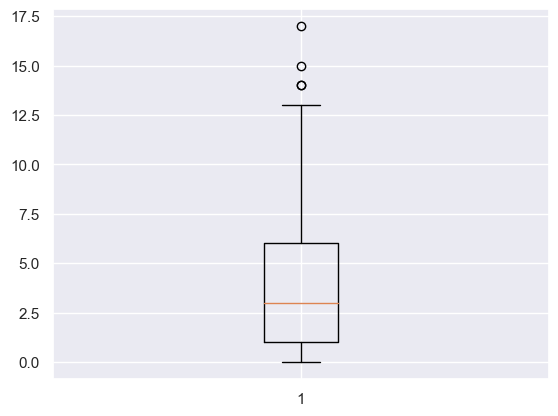

In [16]:
plt.boxplot(diabetcopy['Pregnancies'])

In [17]:
q1 =diabetcopy['Pregnancies'].quantile(0.25)
q3 = diabetcopy['Pregnancies'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

outlier_low = (diabetcopy['Pregnancies']<lower)
outlier_upp = (diabetcopy['Pregnancies']>upper)
diabetcopy['Pregnancies'][(outlier_low|outlier_upp)]
diabetcopy['Pregnancies'][~(outlier_low|outlier_upp)]
diabetcopy = diabetcopy[~(outlier_low|outlier_upp)]
diabetcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1df260cd340>,
 'caps': [<matplotlib.lines.Line2D at 0x1df260cd8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df260cd070>],
 'medians': [<matplotlib.lines.Line2D at 0x1df260cde80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df260d9190>],
 'means': []}

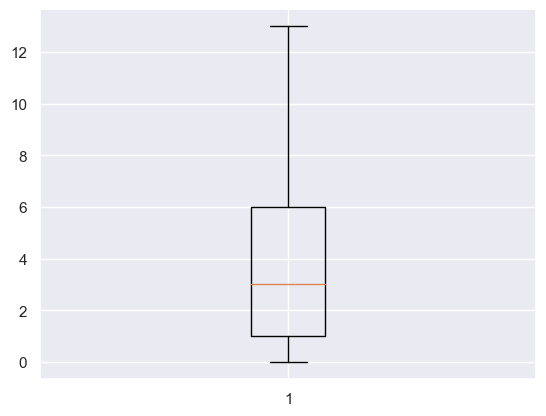

In [18]:
plt.boxplot(diabetcopy['Pregnancies'])

#### Glucose Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df2626c970>,
 'caps': [<matplotlib.lines.Line2D at 0x1df2626cf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df2626c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df260fa4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df260fa7c0>],
 'means': []}

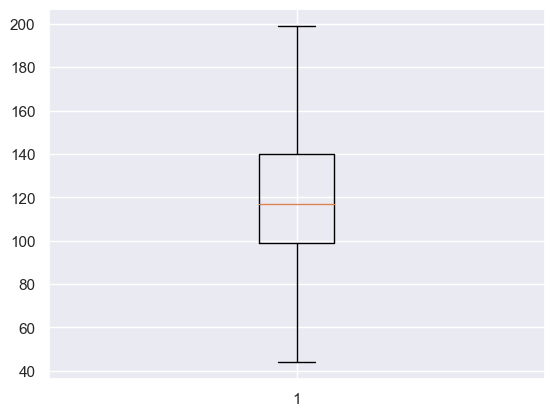

In [19]:
plt.boxplot(diabetcopy['Glucose'])

#### BloodPressure Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df26152ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df26164280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df261529d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df26164820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df26164af0>],
 'means': []}

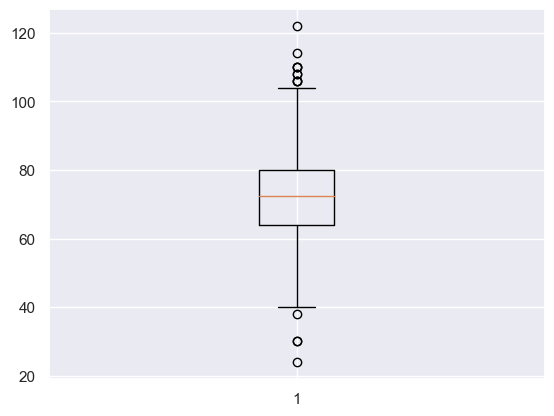

In [20]:
plt.boxplot(diabetcopy['BloodPressure'])

In [21]:
q1 =diabetcopy['BloodPressure'].quantile(0.25)
q3 = diabetcopy['BloodPressure'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

outlier_low = (diabetcopy['BloodPressure']<lower)
outlier_upp = (diabetcopy['BloodPressure']>upper)


In [22]:
diabetcopy['BloodPressure'][(outlier_low|outlier_upp)]


18      30.0
43     110.0
84     108.0
106    122.0
125     30.0
177    110.0
362    108.0
549    110.0
597     24.0
599     38.0
658    106.0
662    106.0
672    106.0
691    114.0
Name: BloodPressure, dtype: float64

In [23]:
diabetcopy['BloodPressure'][~(outlier_low|outlier_upp)]


0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 750, dtype: float64

In [24]:
diabetcopy = diabetcopy[~(outlier_low|outlier_upp)]
diabetcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1df261c90d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df261c9670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df261bbdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df261c9c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df261c9ee0>],
 'means': []}

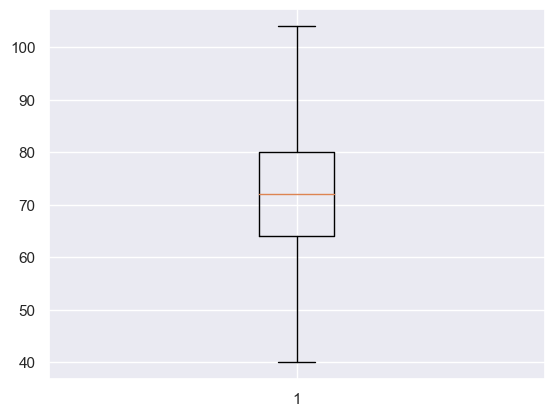

In [25]:
plt.boxplot(diabetcopy['BloodPressure'])

#### SkinThickness Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df26226a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1df26226fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df26226760>],
 'medians': [<matplotlib.lines.Line2D at 0x1df262745b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df26274880>],
 'means': []}

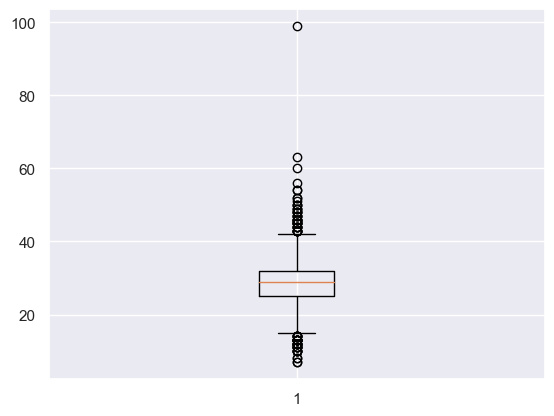

In [26]:
plt.boxplot(diabetcopy['SkinThickness'])

In [27]:
q1 =diabetcopy['SkinThickness'].quantile(0.25)
q3 = diabetcopy['SkinThickness'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

outlier_low = (diabetcopy['SkinThickness']<lower)
outlier_upp = (diabetcopy['SkinThickness']>upper)


In [28]:
diabetcopy['SkinThickness'][(outlier_low|outlier_upp)]

8      45.0
16     47.0
32     11.0
39     47.0
50     11.0
       ... 
698    11.0
710    13.0
718    46.0
753    44.0
763    48.0
Name: SkinThickness, Length: 85, dtype: float64

In [29]:
diabetcopy['SkinThickness'][~(outlier_low|outlier_upp)]

0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
762    29.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 665, dtype: float64

In [30]:
diabetcopy = diabetcopy[~(outlier_low|outlier_upp)]
diabetcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1df262e2400>,
 'caps': [<matplotlib.lines.Line2D at 0x1df262e29a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df262e2130>],
 'medians': [<matplotlib.lines.Line2D at 0x1df262e2f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df262ed250>],
 'means': []}

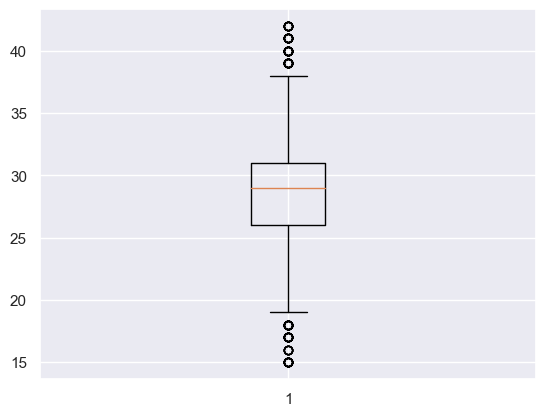

In [31]:
plt.boxplot(diabetcopy['SkinThickness'])

#### Insulin Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df26343730>,
 'caps': [<matplotlib.lines.Line2D at 0x1df26343cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df26343460>],
 'medians': [<matplotlib.lines.Line2D at 0x1df263502b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df26350580>],
 'means': []}

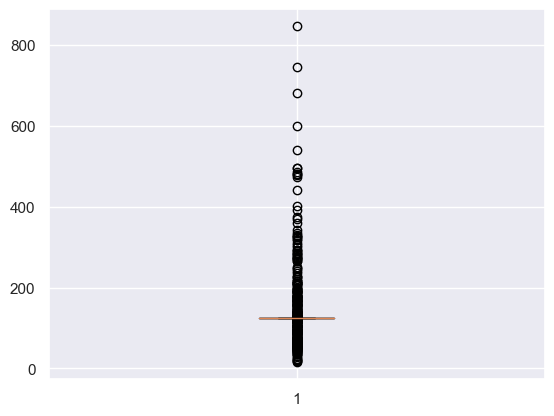

In [32]:
plt.boxplot(diabetcopy['Insulin'])

In [33]:
q1 =diabetcopy['Insulin'].quantile(0.25)
q3 = diabetcopy['Insulin'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

outlier_low = (diabetcopy['Insulin']<lower)
outlier_upp = (diabetcopy['Insulin']>upper)


In [34]:
diabetcopy['Insulin'][(outlier_low|outlier_upp)]

3       94.0
4      168.0
6       88.0
13     846.0
14     175.0
       ...  
748    200.0
751     74.0
755    110.0
760     16.0
765    112.0
Name: Insulin, Length: 307, dtype: float64

In [35]:
diabetcopy['Insulin'][~(outlier_low|outlier_upp)]

0      125.0
1      125.0
2      125.0
5      125.0
7      125.0
       ...  
761    125.0
762    125.0
764    125.0
766    125.0
767    125.0
Name: Insulin, Length: 358, dtype: float64

In [36]:
diabetcopy = diabetcopy[~(outlier_low|outlier_upp)]
diabetcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.000000,29.0,125.0,30.1,0.349,47,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1df263a0e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1df263b1400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df263a0b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1df263b19a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df263b1c70>],
 'means': []}

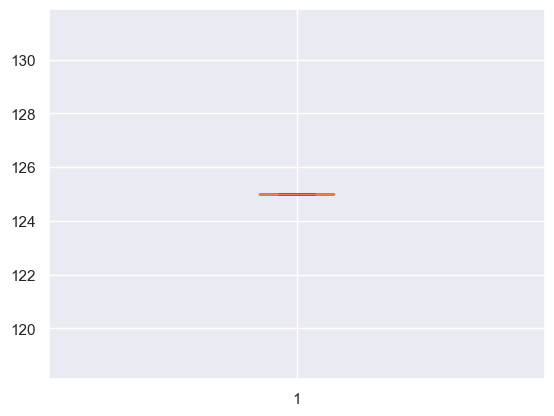

In [37]:
plt.boxplot(diabetcopy['Insulin'])

#### BMI Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df26400fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df2640f580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df26400ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df2640fb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df2640fe50>],
 'means': []}

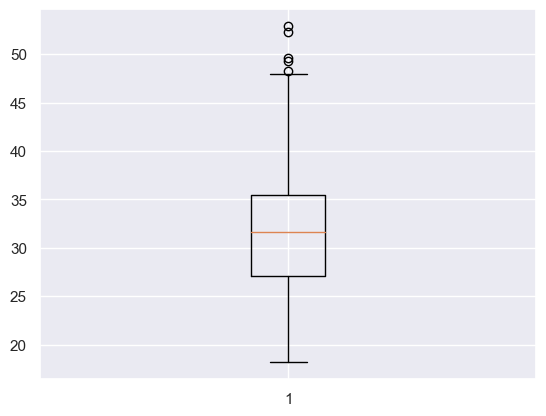

In [38]:
plt.boxplot(diabetcopy['BMI'])

In [39]:
q1 =diabetcopy['BMI'].quantile(0.25)
q3 = diabetcopy['BMI'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

outlier_low = (diabetcopy['BMI']<lower)
outlier_upp = (diabetcopy['BMI']>upper)
diabetcopy['BMI'][(outlier_low|outlier_upp)]
diabetcopy['BMI'][~(outlier_low|outlier_upp)]
diabetcopy = diabetcopy[~(outlier_low|outlier_upp)]
diabetcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.000000,29.0,125.0,30.1,0.349,47,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1df2457f550>,
 'caps': [<matplotlib.lines.Line2D at 0x1df23fa7f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df2457fe50>],
 'medians': [<matplotlib.lines.Line2D at 0x1df23fa78b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df23fa74f0>],
 'means': []}

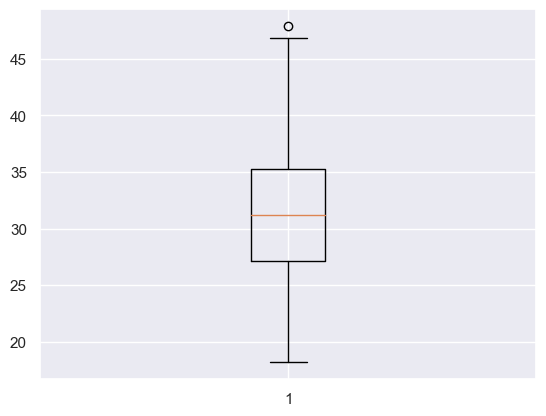

In [40]:
plt.boxplot(diabetcopy['BMI'])

#### DiabetesPedigreeFunction Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df24558af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df24558310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df245584f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df245501c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df245507c0>],
 'means': []}

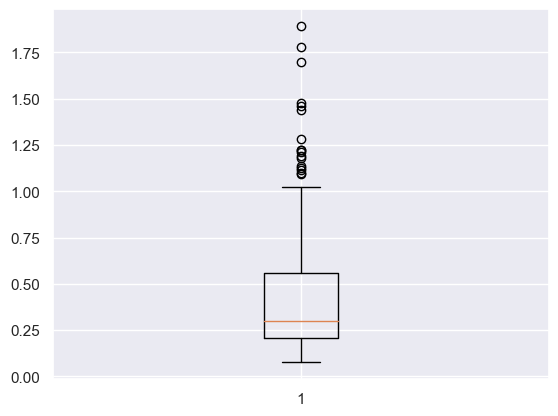

In [41]:
plt.boxplot(diabetcopy['DiabetesPedigreeFunction'])

In [42]:
q1 =diabetcopy['DiabetesPedigreeFunction'].quantile(0.25)
q3 = diabetcopy['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

outlier_low = (diabetcopy['DiabetesPedigreeFunction']<lower)
outlier_upp = (diabetcopy['DiabetesPedigreeFunction']>upper)
diabetcopy['DiabetesPedigreeFunction'][(outlier_low|outlier_upp)]
diabetcopy['DiabetesPedigreeFunction'][~(outlier_low|outlier_upp)]
diabetcopy = diabetcopy[~(outlier_low|outlier_upp)]
diabetcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.000000,29.0,125.0,30.1,0.349,47,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1df2450f070>,
 'caps': [<matplotlib.lines.Line2D at 0x1df2450f430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df2450f190>],
 'medians': [<matplotlib.lines.Line2D at 0x1df245015b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df24501e50>],
 'means': []}

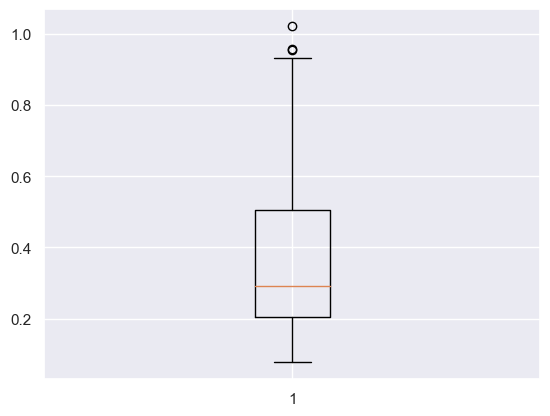

In [43]:
plt.boxplot(diabetcopy['DiabetesPedigreeFunction'])

#### Age Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1df240c8b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1df240c8760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df240c8c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1df2459cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df2459c580>],
 'means': []}

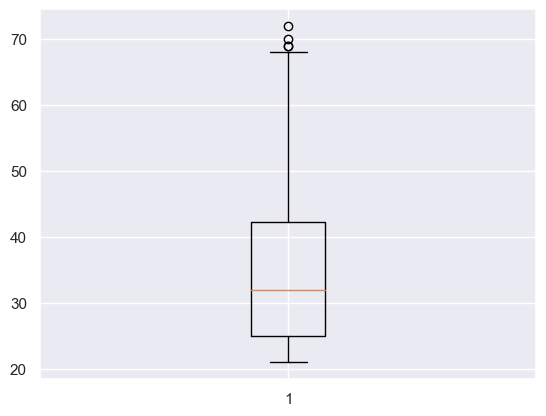

In [44]:
    plt.boxplot(diabetcopy['Age'])

In [45]:
q1 =diabetcopy['Age'].quantile(0.25)
q3 = diabetcopy['Age'].quantile(0.75)
iqr = q3-q1

lower = q1-1.5*iqr
upper = q3+1.5*iqr

outlier_low = (diabetcopy['Age']<lower)
outlier_upp = (diabetcopy['Age']>upper)
diabetcopy['Age'][(outlier_low|outlier_upp)]
diabetcopy['Age'][~(outlier_low|outlier_upp)]
diabetcopy = diabetcopy[~(outlier_low|outlier_upp)]
diabetcopy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.000000,29.0,125.0,30.1,0.349,47,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1df2376b0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df2376b670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df240dddc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df2376bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df2376bee0>],
 'means': []}

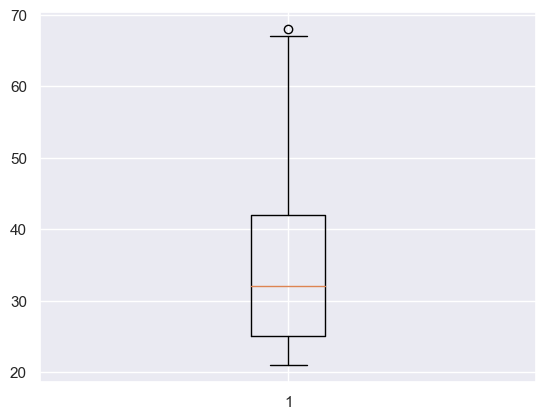

In [46]:
plt.boxplot(diabetcopy['Age'])

#### Outcome Outliers 

{'whiskers': [<matplotlib.lines.Line2D at 0x1df24057190>,
 'caps': [<matplotlib.lines.Line2D at 0x1df24057760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df23fe0e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1df24057d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df24057fd0>],
 'means': []}

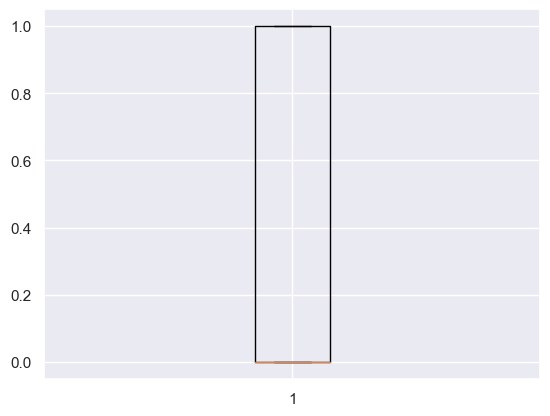

In [47]:
    plt.boxplot(diabetcopy['Outcome'])

In [48]:
diabetcopy.shape

(332, 9)

#### Scaling

In [49]:
 diabetcopy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0


In [50]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetcopy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.490124,1.001053,-0.157383,1.439678,0.0,0.366217,1.204203,1.186805
1,-1.005476,-1.160124,-0.745165,0.015726,0.0,-0.790311,-0.077565,-0.355186
2,1.088364,2.201707,-0.941092,0.015726,0.0,-1.335532,1.413186,-0.274028
3,0.191004,-0.096687,0.038545,0.015726,0.0,-0.955530,-0.774177,-0.436343
4,1.686604,-0.130992,-0.117689,0.015726,0.0,0.647089,-1.085331,-0.517501


## Model Building

In [51]:
X = diabetcopy.drop('Outcome', axis=1)
y = diabetcopy['Outcome']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y) 

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [53]:
#Check the accuracy score for random forest
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7910447761194029


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[40  4]
 [10 13]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        44
           1       0.76      0.57      0.65        23

    accuracy                           0.79        67
   macro avg       0.78      0.74      0.75        67
weighted avg       0.79      0.79      0.78        67



### Support Vector Machine (SVM)

In [55]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [56]:
svc_pred = svc_model.predict(X_test)

In [57]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7313432835820896


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[43  1]
 [17  6]]
              precision    recall  f1-score   support

           0       0.72      0.98      0.83        44
           1       0.86      0.26      0.40        23

    accuracy                           0.73        67
   macro avg       0.79      0.62      0.61        67
weighted avg       0.76      0.73      0.68        67



### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6716417910447762


In [61]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[32 12]
 [10 13]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        44
           1       0.52      0.57      0.54        23

    accuracy                           0.67        67
   macro avg       0.64      0.65      0.64        67
weighted avg       0.68      0.67      0.67        67



### Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [63]:
from sklearn import metrics

predictions = gnb.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.8059701492537313


In [64]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[39  5]
 [ 8 15]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        44
           1       0.75      0.65      0.70        23

    accuracy                           0.81        67
   macro avg       0.79      0.77      0.78        67
weighted avg       0.80      0.81      0.80        67



### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [66]:
from sklearn import metrics

predictions = logreg.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.8208955223880597


In [67]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[43  1]
 [11 12]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.92      0.52      0.67        23

    accuracy                           0.82        67
   macro avg       0.86      0.75      0.77        67
weighted avg       0.84      0.82      0.81        67



## The Conclusion From Model

We have done five model building, from the five models we have done we can conclude the logistic regression model is the best model because it has the highest accuracy value among the five existing models, with an accuracy value of 0.82

## Saving Model (Logistic Regression)

In [68]:
import pickle
# save the model using pickle
savedmodel = pickle.dumps(logreg)

In [69]:
# loading that saved model
logreg_from_pickle = pickle.loads(savedmodel)

In [70]:
# make predictions
logreg_from_pickle.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0], dtype=int64)

The model has been saved, we can then examine a random feature set of the heads and tails of the data to test whether our model is good enough to provide correct predictions.

In [71]:
diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
diabet.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [73]:
# make predictions based on patient no 4
logreg.predict([[0,137,40,35,168,43.1,2.228,33]]) 

array([1], dtype=int64)

Patient is predicted to have diabetes. 

In [74]:
# make predictions based on patient no 763
logreg.predict([[10,101,76,48,180,32.9,0.171,63]])

array([0], dtype=int64)

Patient is predicted not to have diabetes. 

The results are in accordance with the predictions, which means the model is proven to have a good level of prediction.

## Conclusion

In this diabetes dataset with all existing patient records, we can build a machine learning model to predict whether the patient in the data set has diabetes or not, we use five models and we can conclude that the logistic regression model is the best model with the highest accuracy value which is 0.82, along with that we can also draw some insights from the data through data analysis and visualization.